In [1]:
#TSOPOURIDIS GRIGORIOS AM: 3358
import sys
import numpy as np
#pillow (PIL) used to load the image from disk
from PIL import Image
import matplotlib.pyplot as plt


np.seterr('raise')
#otsu method
def otsu(inImage):
    row, col = inImage.shape
        
    #histogram generation
    hist = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            hist[inImage[i][j]] += 1
            
    #normalize histogram
    if(row*col>0):
        hist = hist/(row*col)
    total = 0
    for i in hist:
        total+=i

    #we will split an image in 2 classes, background and foreground (grayscale image)
    #0-256
    curMax, threshold =0,0
    sumTotal, sumBg, sumFg = 0,0,0

    #for later sumFg calculation
    for i in range(0,256):
        sumTotal += i * hist[i]

    bgProb, fgProb = 0, 0
    varBetween, meanBg, meanFg = 0, 0, 0
    
    for i in range(0,len(hist)):
        bgProb += hist[i]
        fgProb = total - bgProb
        
        if fgProb == 0:
            break
        #mean = Sum(i*prob(i))/Prob(class)
        sumBg += i*hist[i]
        sumFg = sumTotal - sumBg

        if(bgProb>0): 
            meanBg = sumBg/bgProb
        if(fgProb>0):
            meanFg = sumFg/fgProb
        
        meanTotal = bgProb*meanBg + fgProb*meanFg

        #between class variance calculation
        varBetween = bgProb*((meanBg-meanTotal)**2) + fgProb*((meanFg-meanTotal)**2)
        
        #check if new maximum variance is found (optimal threshold)
        if varBetween > curMax:
            curMax = varBetween
            threshold = i
    return threshold
        
        
def adaptive(inputPath, outputPath, window_x, window_y):

    inImage = np.array(Image.open(inputPath)) # im2arr.shape: height x width x channel

    #check if image is RGB and convert it.
    if(inImage.ndim == 3):
        #3 channels, colored image
        #iterate through all image pixels and set them to the average of the RGB
        for i in range(len(inImage)):
            for j in range(len(inImage[0])):
                #use inImage[i][j][0] as the 1 channel (grayscale) image array converted from the rgb image
                inImage[i][j][0] = int((int(inImage[i][j][0]) + int(inImage[i][j][1]) + int(inImage[i][j][2]))/3)
        
        #keep only 1 dimension containing the luminocity values
        inImage = inImage[:,:,0]

    #otsu - adapted for each pixel with a neighbourhood window as an image.
    #calculate otsu intra-class variance for seperate pixels by treating an
    #(window_x)x(window_y) area as a separate image   

    #split image into neighbourhoods (sub images), getting the otsu threshold and using thresholding on the image
    #no zero-padding
    otsu_image = np.zeros(inImage.shape,dtype=int)


    for i in range(len(inImage)):
        for j in range(len(inImage[0])):
            #pixel-window
            xWindowLeft = i-window_x
            xWindowRight = i+window_x
            yWindowLeft = j-window_y
            yWindowRight = j+window_y
            while(xWindowLeft < 0):
                xWindowLeft+=1
            while(xWindowRight >= len(inImage)):
                xWindowRight -=1
            while(yWindowLeft < 0):
                yWindowLeft+=1
            while(yWindowRight >= len(inImage[0])):
                yWindowRight -=1

            diffx = xWindowRight-xWindowLeft
            diffy = yWindowRight-yWindowLeft

            sub_image = np.zeros(shape=(diffx,diffy),dtype=int)

            for ix,ii in zip(range(diffx),range(xWindowLeft,xWindowRight)):
                for iy,jj in zip(range(diffy),range(yWindowLeft,yWindowRight)):
                    sub_image[ix][iy] = int(inImage[ii][jj])

            if(inImage[i][j] < otsu(sub_image)):
                otsu_image[i][j] = 0
            else:
                otsu_image[i][j] = 255

    im = Image.fromarray(otsu_image)
    im.show()
    plt.imshow(otsu_image, cmap="gray")
    plt.show()
    im.save(outputPath)



#main function, parses console arguments
if __name__ == "__main__":
    if(len(sys.argv) != 4):
        print("Incorrect format.")
        print("Please type : python3 adaptive.py <input filename> <output filename> <window_size>x<window_size>")
    else:
        x1 = sys.argv[3].split("x")
        adaptive(sys.argv[1], sys.argv[2], int(x1[0]),int(x1[1]))


Incorrect format.
Please type : python3 adaptive.py <input filename> <output filename> <window_size>x<window_size>


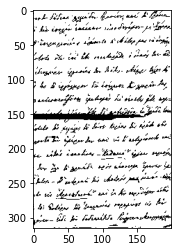

In [2]:
adaptive("trikoupi6_low.png","trikoupi610_low.png",10,10)

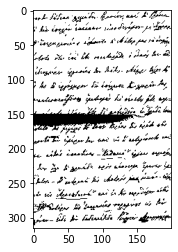

In [3]:
adaptive("trikoupi6_low.png","trikoupi620_low.png",20,20)

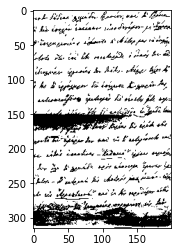

In [4]:
adaptive("trikoupi6_low.png","trikoupi640_low.png",40,40)